In [1]:
##### Model 1 to detect nodes#####

In [1]:
import math
import pandas as pd
import numpy as np
columns = ['label']
columns += ['pixel'+str(i) for i in range(1,50)]
data1 = pd.read_csv("NTruefinal.csv",names = columns, dtype = np.float32)#Model 1 dataset
data1.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,3.0,2.0,2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0
3,0.0,0.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,...,1.0,0.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0,...,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0


In [2]:
from platform import python_version

print(python_version())

3.5.6


In [3]:
data1.shape

(1773, 50)

In [4]:
unique, counts = np.unique(data1.iloc[:,0], return_counts=True)#No.of zero labels and one labels
dict(zip(unique, counts))

{0.0: 887, 1.0: 886}

In [5]:
import numpy as np
import csv

def flat_list(l):
    flat_list = []
    for sublist in l:
        for item in sublist:
            flat_list.append(item)
    return flat_list

Aa=np.loadtxt(open("m_d_banknote.csv", "rb"), delimiter=",")
R=Aa
#A = A.astype(np.uint16)
rows = Aa.shape[0]
cols = Aa.shape[1]
maxValue = np.amax(Aa)
minValue = np.amin(Aa)
fa=[]
for x in range(0, cols ):
    for y in range(0, rows):
        Aa[x,y]=math.ceil(((Aa[x,y]-minValue)/(maxValue-minValue))*255) # Normalization


B=np.pad(Aa, ((3,3),(3,3)), 'constant',constant_values=0) #Padding with 0's
for j in range(3,len(Aa)+3):
    fa.append(flat_list(B[j-3:j+4,j-3:j+4]))
with open("Realivat.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(fa) 

In [6]:
from sklearn.model_selection import train_test_split
X = data1.drop('label', axis=1)
y = data1['label']
X, X_test, y, y_test = train_test_split(X, y, 
                                        test_size = 0.2, 
                                        random_state = 42,shuffle=True)
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)
import time
tic = time.process_time()
rfc_predict = rfc.predict(X_test)
toc = time.process_time()
print(toc - tic)

#print("=== Confusion Matrix ===")
#print(confusion_matrix(y_test, rfc_predict))
#print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))



0.015625
Accuracy: 0.9943661971830986


In [7]:
any(y_test==1)

True

In [8]:
X_test.shape

(355, 49)

In [9]:
daa= pd.read_csv("Realivat.csv",dtype = np.float32)
xpred = daa
x = rfc.predict(xpred)

In [10]:
import matplotlib.patches as patches
from PIL import Image

In [11]:

L=[]# Model 1 Output cordinates
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(Aa.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
#B = A.astype('float32')*255.0/65536.0
#B = B.astype('uint16')
ax.imshow(R,cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('model1banknote.eps') 
plt.show()
 


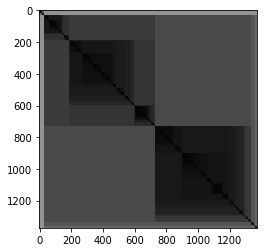

In [12]:
plt.imshow(Aa, cmap='gray')

In [13]:
L

[8,
 18,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 38,
 57,
 58,
 60,
 61,
 64,
 115,
 118,
 121,
 127,
 134,
 137,
 140,
 141,
 151,
 158,
 166,
 171,
 177,
 181,
 188,
 191,
 194,
 221,
 231,
 237,
 264,
 267,
 268,
 274,
 338,
 391,
 411,
 445,
 451,
 461,
 481,
 486,
 491,
 501,
 511,
 531,
 538,
 558,
 568,
 578,
 581,
 591,
 598,
 599,
 600,
 601,
 602,
 603,
 680,
 681,
 682,
 689,
 690,
 691,
 692,
 693,
 696,
 701,
 711,
 712,
 722,
 723,
 724,
 729,
 730,
 838,
 847,
 848,
 849,
 850,
 851,
 885,
 886,
 887,
 888,
 889,
 890,
 901,
 978,
 991,
 993,
 1001,
 1002,
 1003,
 1010,
 1031,
 1032,
 1033,
 1049,
 1050,
 1051,
 1056,
 1057,
 1058,
 1078,
 1079,
 1080,
 1081,
 1092,
 1155,
 1156,
 1157,
 1189,
 1190,
 1191,
 1192,
 1193,
 1194,
 1202,
 1208,
 1212,
 1222,
 1223,
 1224,
 1225,
 1234,
 1235,
 1236,
 1246,
 1247,
 1257,
 1258,
 1259,
 1260,
 1261,
 1262,
 1269,
 1270,
 1279,
 1280,
 1281,
 1282,
 1283,
 1284,
 1285,
 1286,
 1287,
 1288,
 1291,
 1292,
 1293,
 1303,
 1304,
 1309,

In [14]:
#### Model 2 to detect Corners######

In [15]:
R.shape

(1372, 1372)

In [16]:
##### Training #####


import math
import pandas as pd
import numpy as np
columns = ['label']
for i in range(9):
    name = 'mean'+str(i+1)
    columns += [name]
for i in range(9):
    name = 'var'+str(i+1)
    columns += [name]
for i in range(36):
    name = 'interVar'+str(i+1)
    columns += [name]
data = pd.read_csv("MVdata.csv",names = columns, dtype = np.float32)
data.head()



,label,mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,...,interVar27,interVar28,interVar29,interVar30,interVar31,interVar32,interVar33,interVar34,interVar35,interVar36
0,1.0,255.0,3.666667,3.000000,255.0,5.0,5.0,255.0,255.0,255.0,...,0.0,5625.000000,11718.7500,5625.000000,11718.7500,15625.00,11718.7500,0.00,0.0,0.0
1,1.0,255.0,2.000000,2.000000,255.0,3.0,3.0,255.0,89.0,89.0,...,0.0,5715.359863,1386.7500,665.640015,11907.0000,1849.00,1386.7500,5166.75,6889.0,0.0
2,1.0,89.0,11.333333,11.333333,89.0,16.0,16.0,255.0,255.0,255.0,...,0.0,5140.890137,10710.1875,5140.890137,10710.1875,14280.25,10710.1875,0.00,0.0,0.0
3,1.0,255.0,5.333333,4.000000,255.0,9.0,9.0,255.0,255.0,255.0,...,0.0,5446.439941,11346.7500,5446.439941,11346.7500,15129.00,11346.7500,0.00,0.0,0.0
4,1.0,255.0,1.000000,1.000000,255.0,1.0,1.0,255.0,255.0,255.0,...,0.0,5806.439941,12096.7500,5806.439941,12096.7500,16129.00,12096.7500,0.00,0.0,0.0


In [17]:
data.iloc[2089,:]

label           0.000000
mean1          81.000000
mean2          81.000000
mean3          81.000000
mean4          81.000000
mean5          81.000000
mean6          81.000000
mean7         104.000000
mean8         104.000000
mean9         104.000000
var1            0.000000
var2            0.000000
var3            0.000000
var4            0.000000
var5            0.000000
var6            0.000000
var7            0.000000
var8            0.000000
var9            0.000000
interVar1       0.000000
interVar2       0.000000
interVar3       0.000000
interVar4       0.000000
interVar5       0.000000
interVar6     132.250000
interVar7      99.187500
interVar8     132.250000
interVar9       0.000000
interVar10      0.000000
interVar11      0.000000
interVar12      0.000000
interVar13     99.187500
interVar14    132.250000
interVar15     99.187500
interVar16      0.000000
interVar17      0.000000
interVar18      0.000000
interVar19    132.250000
interVar20     99.187500
interVar21    132.250000


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data.iloc[:,1:])
data.iloc[:,1:]=scaler.transform(data.iloc[:,1:])


C:\Users\sanju\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype float32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
data.head()

,label,mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9,...,interVar27,interVar28,interVar29,interVar30,interVar31,interVar32,interVar33,interVar34,interVar35,interVar36
0,1.0,1.000000,0.014379,0.011765,1.000000,0.019608,0.019608,1.0,1.000000,1.000000,...,0.0,0.961169,0.961169,0.961169,0.961169,0.961169,0.961169,0.000000,0.000000,0.0
1,1.0,1.000000,0.007843,0.007843,1.000000,0.011765,0.011765,1.0,0.346457,0.346742,...,0.0,0.976609,0.113741,0.113741,0.976609,0.113741,0.113741,0.427119,0.426745,0.0
2,1.0,0.319672,0.044444,0.044444,0.319672,0.062745,0.062745,1.0,1.000000,1.000000,...,0.0,0.878447,0.878447,0.878447,0.878447,0.878447,0.878447,0.000000,0.000000,0.0
3,1.0,1.000000,0.020915,0.015686,1.000000,0.035294,0.035294,1.0,1.000000,1.000000,...,0.0,0.930657,0.930657,0.930657,0.930657,0.930657,0.930657,0.000000,0.000000,0.0
4,1.0,1.000000,0.003922,0.003922,1.000000,0.003922,0.003922,1.0,1.000000,1.000000,...,0.0,0.992172,0.992172,0.992172,0.992172,0.992172,0.992172,0.000000,0.000000,0.0


In [20]:
#np.where(np.isnan(data)==1)

In [21]:
unique, counts = np.unique(data.iloc[:,0], return_counts=True)
dict(zip(unique, counts))

{0.0: 1090, 1.0: 1455}

In [22]:

from sklearn.model_selection import train_test_split
X = data.drop('label', axis=1)
y = data['label']
X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle=True)
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(X,y)
import time
tic = time.process_time()
rfc_predict = rfc2.predict(X_test)
toc = time.process_time()
print(toc - tic)

#print("=== Confusion Matrix ===")
#print(confusion_matrix(y_test, rfc_predict))
#print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))








0.015625
Accuracy: 0.9980353634577603


In [23]:
#any(X.isnull()==1)

In [24]:
#from sklearn.svm import SVC
#from sklearn.metrics import confusion_matrix
#from sklearn import metrics
#classifier_linear = SVC(kernel='linear',gamma='auto', random_state = 1)
#classifier_rbf = SVC(kernel='rbf',gamma='auto', random_state = 1)
#X = data.drop('label', axis=1)
#y = data['label']
#X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle=True)

#classifier_rbf.fit(X,y)
#classifier_linear.fit(X,y)
#tic = time.process_time()
#Y_pred_rbf = classifier_rbf.predict(X_test)
#Y_linear = classifier_linear.predict(X_test)
#toc = time.process_time()
#print(toc - tic)

#print("Accuracy_rbf:",metrics.accuracy_score(y_test, Y_pred_rbf))
#print("Accuracy_linear:",metrics.accuracy_score(y_test, Y_linear))

In [25]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix
#from sklearn import metrics
#Create KNN Classifier
#knn = KNeighborsClassifier(n_neighbors=5)
#X = data.drop('label', axis=1)
#y = data['label']
#X, X_test, y, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,shuffle=True)


#Train the model using the training sets
#knn.fit(X, y)
#tic = time.process_time()
#Predict the response for test dataset
#knn_pred = knn.predict(X_test)
#toc = time.process_time()
#print(toc - tic)
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

In [26]:
### Testing ###

Ax=np.loadtxt(open("m_d_banknote.csv" , "rb"), delimiter=",")
rows = Ax.shape[0]
cols = Ax.shape[1]
maxValue = np.amax(Ax)
minValue = np.amin(Ax)
for x in range(0, cols ):
    for y in range(0, rows):
        Ax[x,y]=math.ceil(((Ax[x,y]-minValue)/(maxValue-minValue))*255)
Bx=np.pad(Ax, ((3,3),(3,3)), 'constant',constant_values=255)
#Cx=np.loadtxt(open("label.csv" , "rb"), delimiter="/n") 




In [27]:
def mvfeaturegeneration(b):
    W=b
    g1=W[0:3,0:3]#groups
    g2=W[0:3,3]
    g3=W[0:3,4:7]
    g4=W[3,0:3]
    g5=W[3,3]
    g6=W[3,4:7]
    g7=W[4:7,0:3]
    g8=W[4:7,3]
    g9=W[4:7,4:7]
    groups = [g1,g2,g3,g4,g5,g6,g7,g8,g9]
    
    meanf = np.zeros(9)
    varf = np.zeros(9)
    for idx,grp in enumerate(groups):
        mean = np.mean(grp)
        var = np.sum((grp-mean)**2)
        meanf[idx] = mean
        varf[idx] = var
    
    intervarf = np.zeros(36)
    idx = 0
    for i in range(9):
        for j in range(i+1,9):
            g1 = groups[i]
            g2 = groups[j]
            W1=(g1.size)/((g1.size)+(g2.size))
            W2=(g2.size)/((g1.size)+(g2.size))
            mu=((meanf[i]-meanf[j])**2)
            ivar=W1*W2*mu
            intervarf[idx] = ivar
            idx += 1

    return (np.concatenate((meanf,varf,intervarf),axis=None).tolist())

In [28]:
L.insert(0,-1)
s=len(Ax)
M = []
for i in range(len(L)):  
    J=L[i]+4
    if(J+3 < s+3):
        for j in range(J+3,s+3):
            M.append(mvfeaturegeneration(Bx[int(j-3):int(j+4),int(J-3):int(J+4)])+[j,J])
    print("completed feature generation: {:.2f}%".format((i+1)*100/len(L)))
M = np.array(M)

completed feature generation: 0.56%
completed feature generation: 1.12%
completed feature generation: 1.68%
completed feature generation: 2.23%
completed feature generation: 2.79%
completed feature generation: 3.35%
completed feature generation: 3.91%
completed feature generation: 4.47%
completed feature generation: 5.03%
completed feature generation: 5.59%
completed feature generation: 6.15%
completed feature generation: 6.70%
completed feature generation: 7.26%
completed feature generation: 7.82%
completed feature generation: 8.38%
completed feature generation: 8.94%
completed feature generation: 9.50%
completed feature generation: 10.06%
completed feature generation: 10.61%
completed feature generation: 11.17%
completed feature generation: 11.73%
completed feature generation: 12.29%
completed feature generation: 12.85%
completed feature generation: 13.41%
completed feature generation: 13.97%
completed feature generation: 14.53%
completed feature generation: 15.08%
completed feature 

In [29]:
M[:,:-2]=scaler.transform(M[:,:-2])

In [30]:
preds = rfc2.predict(M[:,:-2])
D = M[preds == 1,-2:]

In [31]:
x1 = np.array(D)[:,0] -3 # To remove padding shift
y1 = np.array(D)[:,1] - 3

In [32]:
D

array([[   6.,    3.],
       [  11.,    3.],
       [  12.,    3.],
       ...,
       [1373., 1361.],
       [1368., 1365.],
       [1369., 1366.]])

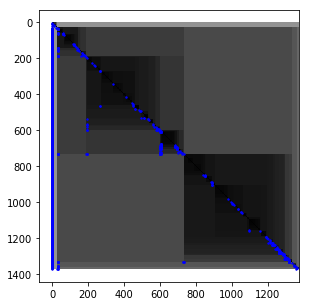

In [33]:
plt.figure(figsize = (10,5))
plt.imshow(Aa, cmap='gray')
plt.scatter(y1,x1, c='b',s=2)
plt.savefig('model2cortex.eps') 

In [43]:
l=[1,2,4]
l.insert(0,-1)

In [44]:
l

[-1, 1, 2, 4]

In [ ]:
#Other Models not needed now

In [15]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X, y)
tic = time.process_time()
knn_pred = knn.predict(X_test)
toc = time.process_time()
print(toc - tic)

#Predict the response for test dataset


from sklearn import metrics
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

TypeError: Singleton array array(1055) cannot be considered a valid collection.

In [223]:
any(y_test==1)

True

In [224]:
x = knn.predict(xpred)

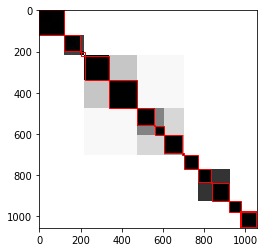

In [225]:
import matplotlib.patches as patches
from PIL import Image
L=[]
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(A.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
B = A.astype('float32')*255.0/65536.0
B = B.astype('uint16')
ax.imshow(B, cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('modelPredictionKNN4.eps') 
plt.show()
 

In [226]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Train Decision Tree Classifer
clf = clf.fit(X,y)

#Predict the response for test dataset
tic = time.process_time()
Des_pred = clf.predict(X_test)
toc = time.process_time()
print(toc - tic)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Accuracy:",metrics.accuracy_score(y_test, Des_pred))


0.0
=== Confusion Matrix ===
[[180   2]
 [  0 178]]


Accuracy: 0.9972222222222222


In [227]:
x = clf.predict(xpred)

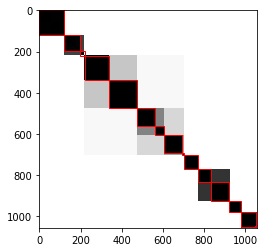

In [228]:
import matplotlib.patches as patches
from PIL import Image
L=[]
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(A.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
B = A.astype('float32')*255.0/65536.0
B = B.astype('uint16')
ax.imshow(B, cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('modelPredictionDTC4.eps') 
plt.show()

In [229]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics

classifier_linear = SVC(kernel='linear',gamma='auto', random_state = 1)
classifier_rbf = SVC(kernel='rbf',gamma='auto', random_state = 1)

classifier_rbf.fit(X,y)
classifier_linear.fit(X,y)
tic = time.process_time()
Y_pred_rbf = classifier_rbf.predict(X_test)
Y_linear = classifier_linear.predict(X_test)
toc = time.process_time()
print(toc - tic)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')

print("Accuracy_rbf:",metrics.accuracy_score(y_test, Y_pred_rbf))
print("Accuracy_linear:",metrics.accuracy_score(y_test, Y_linear))


0.0625
=== Confusion Matrix ===
[[180   2]
 [  0 178]]


Accuracy_rbf: 0.5055555555555555
Accuracy_linear: 0.9972222222222222


In [230]:
x = classifier_linear.predict(xpred)

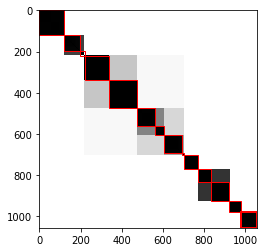

In [231]:
import matplotlib.patches as patches
from PIL import Image
L=[]
for i in range(0,len(x)):
    if x[i]==1:
        L.append(i)
L.append(A.shape[0])
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1)
B = A.astype('float32')*255.0/65536.0
B = B.astype('uint16')
ax.imshow(B, cmap='gray')
width,height = L[0],L[0]
for z in range(0,len(L)-1):
    rect = patches.Rectangle((L[z],L[z]),-width,-height,linewidth=1,edgecolor='r',facecolor='none')
#     plt.scatter([int(L[z])],[int(L[z])], color='red', s=1)
    width, height = L[z+1]-L[z],L[z+1]-L[z]
    ax.add_patch(rect)
rect = patches.Rectangle((L[z],L[z]),width,height,linewidth=2,edgecolor='r',facecolor='none')
ax.add_patch(rect)

plt.savefig('modelPredictionSVMlinear4.eps') 
plt.show()

In [209]:
a=[[1,2,3],[4,5,6]]

In [18]:
a[:][0:1]

[[1, 2, 3]]

In [23]:
from PIL import Image
import numpy as np
import sys
import os
import csv
img_file = Image.open('Ivatest.jpg')
    # img_file.show()

# get original image parameters...
width, height = img_file.size
format = img_file.format
mode = img_file.mode

# Make image Greyscale
img_grey = img_file.convert('L')
#img_grey.save('result.png')
#img_grey.show()

# Save Greyscale values
value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
value = value.flatten()
print(value)
with open("Ivatest.csv", 'a') as f:
    writer = csv.writer(f)
    writer.writerow(value)

[255 255 255 ... 255 255 255]


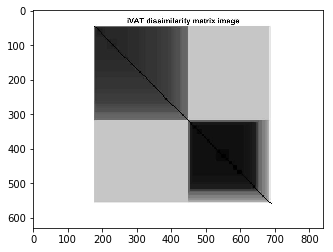

In [20]:
import matplotlib.image as img
import matplotlib.pyplot as plt
image = img.imread('Ivatest.jpg')
#print(image)
plt.imshow(image)